# Forecasting moss & lichen fractional cover mean
## with a Neural Network using Keras
## (Reading X and Y train/test files stored locally)
#
# For lichen output only

In [1]:
pip install tensorflow tables --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
print('Starting imports')
import numpy as np
import os
import pandas as pd
import seaborn  as sns
from tensorflow import keras
import keras.utils
print('Finished imports')

Starting imports


2023-03-20 09:23:23.426835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 09:23:23.588516: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 09:23:23.588553: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 09:23:24.346606: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Finished imports


In [3]:
Hlayers = 8
Olayers = 1
epochs = 32
Hactivation = 'relu'
Oactivation='sigmoid'
print('Hidden layers = ', Hlayers)
print('Output layers = ', Olayers)
print('Hidden layer activation = ', Hactivation)
print('Output layer activation = ', Oactivation)
print('Epochs = ', epochs)
expname = 'TPS_mean_' + str(Hlayers) + 'Hlayers-' + str(Olayers) + 'Olayers-' + str(epochs) + 'epochs-' + Hactivation + '-' + Oactivation
print('Experiment name = ', expname)

Hidden layers =  8
Output layers =  1
Hidden layer activation =  relu
Output layer activation =  sigmoid
Epochs =  32
Experiment name =  TPS_mean_8Hlayers-1Olayers-32epochs-relu-sigmoid


In [54]:
# Read local .hdf file
path = '/home/jovyan/Arctic/Vegetation_in_Troms_and_Finnmark/data/'

print('Reading X_train')
X_train_file = os.path.join(path, 'X_mean_tp_train.hdf')
X_train = pd.read_hdf(X_train_file)
X_train.fillna(0, inplace=True)

print('Reading X_test')
X_test_file = os.path.join(path, 'X_mean_tp_test.hdf')
X_test = pd.read_hdf(X_test_file)
X_test.fillna(0, inplace=True)

print('Reading y_train')
y_train_file = os.path.join(path, 'y_mean_tp_train.hdf')
y_train = pd.read_hdf(y_train_file)
y_train.fillna(0, inplace=True)

print('Reading y_test')
y_test_file = os.path.join(path, 'y_mean_tp_test.hdf')
y_test = pd.read_hdf(y_test_file)
y_test.fillna(0, inplace=True)

Reading X_train
Reading X_test
Reading y_train
Reading y_test


In [52]:
# Instantiate a keras.Input class and tell it how big our input is.
print('Instantiating the Keras input class')
inputs = keras.Input(shape = X_train.shape[1])

# Create the hidden layer
print('Creating the hidden layer')
hidden_layer = keras.layers.Dense(Hlayers, activation=Hactivation)(inputs)

# Create the output layer
print('Creating the output layer')
output_layer = keras.layers.Dense(Olayers, activation=Oactivation)(hidden_layer)

# Create a Keras model
print('Creating the model')
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

# Compile the model with a Mean Square Error loss function and the Adam optimizer
print('Compiling the model')
model.compile(optimizer='sgd', loss=keras.losses.LogCosh())

Instantiating the Keras input class
Creating the hidden layer
Creating the output layer
Creating the model
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8785)]            0         
                                                                 
 dense_2 (Dense)             (None, 8)                 70288     
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________
Compiling the model


In [6]:
# Train the model
print('Training the model')
history = model.fit(X_train, y_train, epochs=epochs)

Training the model
Epoch 1/32
69/69 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 2/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 3/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 4/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 5/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 6/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 7/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 8/32
69/69 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 9/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 11/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 12/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 13/32
69/69 [===========

Generating the history loss plot


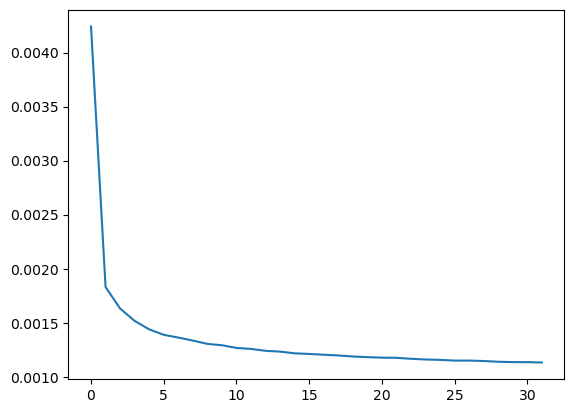

In [7]:
# Plot the loss history
print('Generating the history loss plot')
lineplot = sns.lineplot(x=history.epoch, y=history.history['loss'])
fig = lineplot.get_figure()
loss_fig_file = os.path.join(path, 'outputs/' + expname + '_loss.png')
fig.savefig(loss_fig_file) 

In [ ]:
model_file = os.path.join(path, 'outputs/' + expname + '.h5')
model.save(model_file)

In [67]:
# Perform a prediction
print('Forecasting', y_test.sum())
y_forecast = model.predict(X_test).tolist()

Forecasting new_Lichen_mean    49.908648
dtype: float64
18/18 [==============================] - 0s 2ms/step


In [25]:
y_forecast = pd.DataFrame(y_forecast)

In [36]:
y_forecast.columns = ['Forecasted_lichen']

In [37]:
y_forecast

,Forecasted_lichen
0,0.086544
1,0.085925
2,0.084924
3,0.140664
4,0.069547
...,...
544,0.140412
545,0.141394
546,0.088803
547,0.067610


In [38]:
filename = os.path.join(path, 'y_forecast.csv')
y_forecast.to_csv(filename, header=True, index=None, sep=',')

In [9]:
filename = os.path.join(path, 'y_test.csv')
y_test.to_csv(filename, header=True, index=None, sep=',')

In [56]:
y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'])

,new_Lichen_mean
0,0.020000
1,0.129444
2,0.050000
3,0.151398
4,0.030000
...,...
544,0.126000
545,0.030000
546,0.085833
547,0.040000


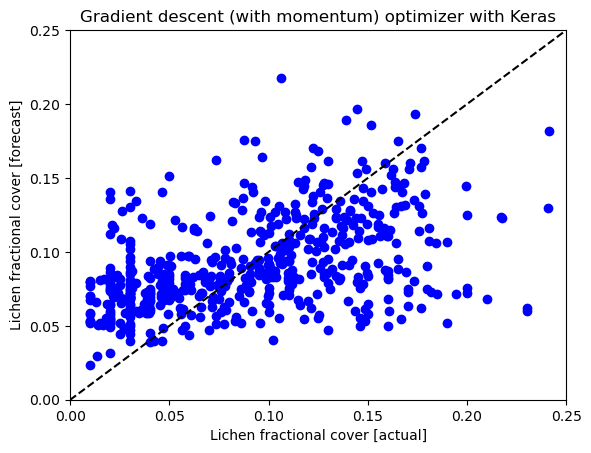

In [46]:
# Predictions vs. True Values PLOT
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(y_test, y_forecast, marker = 'o', c = 'blue')
plt.plot([-5,20], [-5,20], color = 'black', ls = '--')

plt.ylabel('Lichen fractional cover [forecast]')
plt.xlabel('Lichen fractional cover [actual]')
plt.title('Gradient descent (with momentum) optimizer with Keras')

plt.ylim(0., 0.25)
plt.xlim(0., 0.25)

plt.axis(True)
plt.show()

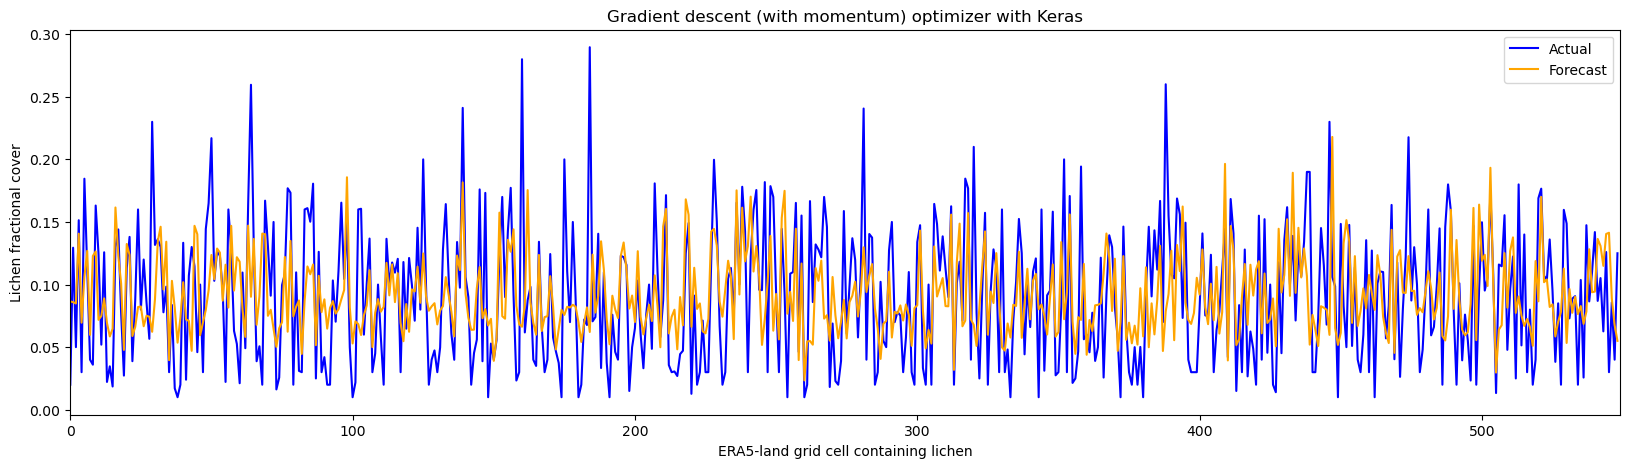

In [66]:
# Predictions vs. True Values PLOT
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

plt.plot(y_test, c = 'blue')
plt.plot(y_forecast, c = 'orange')

plt.ylabel('Lichen fractional cover')
plt.xlabel('ERA5-land grid cell containing lichen')
plt.title('Gradient descent (with momentum) optimizer with Keras')

plt.xlim(0., len(y_test))
ax.legend(['Actual', 'Forecast'])

In [ ]:
print('Finished!')